<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
# URL = 
# URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

---


# Test Environment


# Prompt 1 Importing the Dataset
Write a Python code that can perform the following tasks.
1. Read the CSV file, located on a given file path, into a pandas data frame, assuming that the first row of the file can be used as the headers for the data.
2. Print the first 5 rows of the dataframe to verify correct loading.

In [4]:
import pandas as pd

# Specify the file path where the CSV file is located
file_path = "dataset.csv"

# Read the CSV file into a pandas data frame
df = pd.read_csv(file_path)

# Print the first 5 rows of the dataframe
print(df.head())

     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


# Prompt 2  Data Preparation (Data Cleaning)
Write a python code that performs the following tasks:
1. Identify the columns of a data frame with missing values.
2. Replace the missing values thus identified with mean value of the column.
3. Deletes the duplicate entries from the data frame.

In [5]:
import pandas as pd

# Assume 'df' is the pandas data frame you are working with

# Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()]

# Replace missing values with mean value of the column
for column in columns_with_missing_values:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

# Delete duplicate entries
df.drop_duplicates(inplace=True)

In [6]:
df.describe()

,year,mileage,tax,mpg,engineSize,price
count,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000
mean,2016.862396,23381.146362,113.314731,57.908696,1.350623,12269.556310
std,2.052039,19419.011045,62.034599,10.132696,0.432581,4736.285417
min,1996.000000,1.000000,0.000000,20.800000,0.000000,495.000000
25%,2016.000000,10000.000000,30.000000,52.300000,1.000000,8999.000000
50%,2017.000000,18277.000000,145.000000,58.900000,1.200000,11288.000000
75%,2018.000000,31098.500000,145.000000,65.700000,1.500000,15295.000000
max,2060.000000,177644.000000,580.000000,201.800000,5.000000,54995.000000


# Data Insights and Visualization

# Prompt 3 
Write a python code that identifies the top 5 attributes with highest correlation with the target attribute in a data frame.

In [9]:
import pandas as pd

# Assume 'df' is the pandas data frame you are working with
# Assume 'target_column' is the name of the target attribute

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Sort the correlations with the target attribute
correlations_with_target = correlation_matrix['price'].sort_values(ascending=False)

# Identify the top 5 attributes with the highest correlation with the target attribute
top_5_correlations = correlations_with_target[1:6]

print(top_5_correlations)

<ipython-input-9-3961f60b0085>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


year          0.635715
engineSize    0.411451
tax           0.405970
mpg          -0.346263
mileage      -0.530483
Name: price, dtype: float64



# Prompt 4
Write a python code that counts the number of entries in a dataframe with each unique value of a specific attribute.

In [10]:
import pandas as pd

# Assume 'df' is the pandas data frame you are working with
# Assume 'specific_attribute' is the name of the specific attribute you want to count unique values for

# Count the number of entries with each unique value of the specific attribute
unique_value_counts = df['fuelType'].value_counts()

print(unique_value_counts)

Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64


# Prompt 5
Write a python code that creates a Seaborn box plot between a source and target attributes of a dataframe.

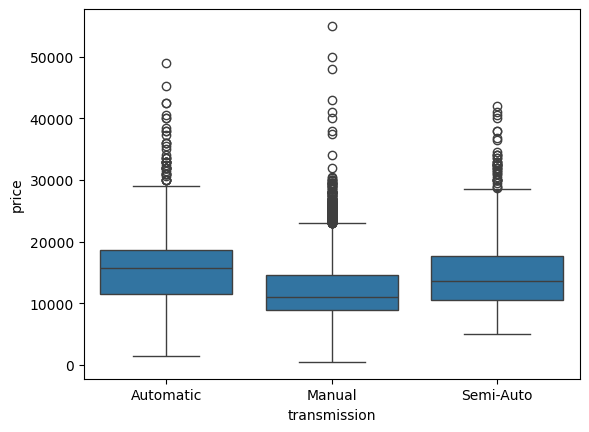

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'df' is the pandas data frame you are working with
# Assume 'source_attribute' is the name of the source attribute
# Assume 'target_attribute' is the name of the target attribute

# Create a box plot using Seaborn
sns.boxplot(x=df['transmission'], y=df['price'])

# Show the plot
plt.show()


# Prompt 6
Write a python code that creates a regression plot between a source attribute and a target attribute.

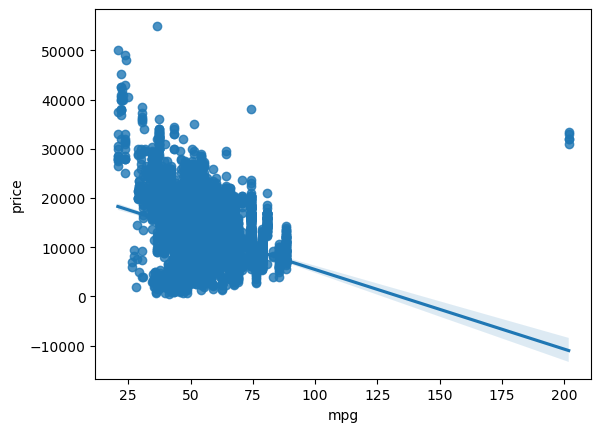

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'df' is the pandas data frame you are working with
# Assume 'source_attribute' is the name of the source attribute
# Assume 'target_attribute' is the name of the target attribute

# Create a regression plot using Seaborn
sns.regplot(x=df['mpg'], y=df['price'])

# Show the plot
plt.show()

# Model Development and Evaluation

# Prompt 7
Write a python code to fit a linear regression model on a target variable on basis of a source variable. Calculate the R^2 values and MSE values for this model.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Assume 'df' is the pandas data frame you are working with
# Assume 'source_attribute' is the name of the source attribute
# Assume 'target_attribute' is the name of the target attribute

# Create the feature matrix X and target vector y
X = df[['mpg']]
y = df['price']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the target variable
y_pred = model.predict(X)

# Calculate R^2 value
r2 = r2_score(y, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

print("R^2 value:", r2)
print("Mean Squared Error (MSE):", mse)

R^2 value: 0.1198980224962416
Mean Squared Error (MSE): 19741690.809446193


# Prompt 8
Write a python code to fit a linear regression model on a target variable on basis of a set of source variables. Calculate the R^2 values and MSE values for this model.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Assume 'df' is the pandas data frame you are working with
# Assume 'source_attributes' is a list of names of the source attributes
# Assume 'target_attribute' is the name of the target attribute

# Create the feature matrix X and target vector y
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize' ]]
y = df['price']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the target variable
y_pred = model.predict(X)

# Calculate R^2 value
r2 = r2_score(y, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

print("R^2 value:", r2)
print("Mean Squared Error (MSE):", mse)

R^2 value: 0.7265379654547005
Mean Squared Error (MSE): 6134065.224381731


# Prompt 9
Write a python code that can perform the following tasks.

1. Create a pipeline with standard scalar, second degree polynomial features and linear regression model.
2. Fit this pipeline for a target variable using a set of source attributes from a dataframe.
3. Evaluate the R^2 and MSE values for the trained model.

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Assume 'df' is the pandas data frame you are working with
# Assume 'source_attributes' is a list of names of the source attributes
# Assume 'target_attribute' is the name of the target attribute

# Create the feature matrix X and target vector y
# X = df[source_attributes]
# y = df['target_attribute']
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize' ]]
y = df['price']


# Create a pipeline with StandardScaler, PolynomialFeatures, and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('regression', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X, y)

# Predict the target variable
y_pred = pipeline.predict(X)

# Calculate R^2 value
r2 = r2_score(y, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

print("R^2 value:", r2)
print("Mean Squared Error (MSE):", mse)

R^2 value: 0.7666619695239302
Mean Squared Error (MSE): 5234038.06546274


# Prompt 10
Write a python code that can perform the following tasks.

1. Assuming that a subset of the attributes of a data frame are source attributes and one of the attributes is a target attribute, split the data into training and testing data assuming the testing data to be 20%.
2. Create and fit a Ridge regression model using the training data, setting the regularization parameter to 0.1.
3. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Assume 'df' is the pandas data frame you are working with
# Assume 'source_attributes' is a list of names of the source attributes
# Assume 'target_attribute' is the name of the target attribute

# Create the feature matrix X and target vector y
# X = df[source_attributes]
# y = df['target_attribute']
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize' ]]
y = df['price']


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Ridge regression model with regularization parameter = 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Predict the target variable using the testing data
y_pred = ridge_model.predict(X_test)

# Calculate R^2 value
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print("R^2 value:", r2)
print("Mean Squared Error (MSE):", mse)

R^2 value: 0.6917134446113138
Mean Squared Error (MSE): 6912725.801054926


# Prompt 11
Write a python code that can perform the following tasks.

1. Assuming that a subset of the attributes of a data frame are source attributes and one of the attributes is a target attribute, split the data into training and testing data assuming the testing data to be 20%.
2. Apply second degree polynomial scaling to the training and testing data.
3. Create and fit a Ridge regression model using the training data, setting the regularization parameter to 0.1.
4. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Assume 'df' is the pandas data frame you are working with
# Assume 'source_attributes' is a list of names of the source attributes
# Assume 'target_attribute' is the name of the target attribute

# Create the feature matrix X and target vector y
# X = df[source_attributes]
# y = df['target_attribute']
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize' ]]
y = df['price']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply second degree polynomial scaling to the training and testing data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit a Ridge regression model with regularization parameter = 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

# Predict the target variable using the testing data
y_pred = ridge_model.predict(X_test_poly)

# Calculate R^2 value
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print("R^2 value:", r2)
print("Mean Squared Error (MSE):", mse)

/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


R^2 value: 0.6732748888228912
Mean Squared Error (MSE): 7326174.516559619


# Prompt 12
Write a python code that can perform the following tasks.

1. Assuming that a subset of the attributes of a data frame are source attributes and one of the attributes is a target attribute, split the data into training and testing data assuming the testing data to be 20%.
2. Apply second degree polynomial scaling to the training and testing data.
3. Create and fit a Grid search on Ridge regression with cross validation using the training data, for a set of values of the parameter alpha.
4. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Assume 'df' is the pandas data frame you are working with
# Assume 'source_attributes' is a list of names of the source attributes
# Assume 'target_attribute' is the name of the target attribute

# Create the feature matrix X and target vector y
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize' ]]
y = df['price']


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply second degree polynomial scaling to the training and testing data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create Ridge regression model
ridge = Ridge()
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Set of values for the parameter alpha

# Perform Grid search with cross validation
ridge_grid = GridSearchCV(ridge, parameters, cv=4)
ridge_grid.fit(X_train_poly, y_train)

# Predict the target variable using the testing data
y_pred = ridge_grid.predict(X_test_poly)

# Calculate R^2 value
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print("R^2 value:", r2)
print("Mean Squared Error (MSE):", mse)

/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.88233e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.01744e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.78199e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-24): res

R^2 value: 0.38273414165607345
Mean Squared Error (MSE): 13840985.117578594


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
